# Convert AB magnitudes data to Flux data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from astropy import units as u

data2 = pd.read_csv('data/GRB250916A (3).csv')
    
x=data2["Time - t0 (hours)"]*3600
y1=3.631e6*(10**(-0.4*data2["Magnitude"]))
y1err=y1-3.631e6*(10**(-0.4*(data2["Magnitude"]+data2["Error"])))

filt_freqs={'i':393170436721311.5, 'z':328215960148894.2,
    'VT_B':605000000000000.0, 'VT_R':381000000000000.0, 'r':481130569731985.2, 'J':240000000000000.0, 
    'g':628495719077568.1,'R':468671768303359.2, 'L':86898551000000,
    'SAO-R':45562310000000, 'u': 865201898990000}
freqs=[filt_freqs[freq] for freq  in data2['Filter ']]
df = pd.DataFrame({
    'Times': list(x),
    'Fluxes': list(y1),
    'FluxErrs': list(y1err),
    'Filt': list(data2['Filter ']),
    'Freqs': list(freqs),
})
df.to_csv('data/GRB250916A_opt.csv', index=False)
#print(y1)

#print(y1err)

# Visualize observational data

displaying plot


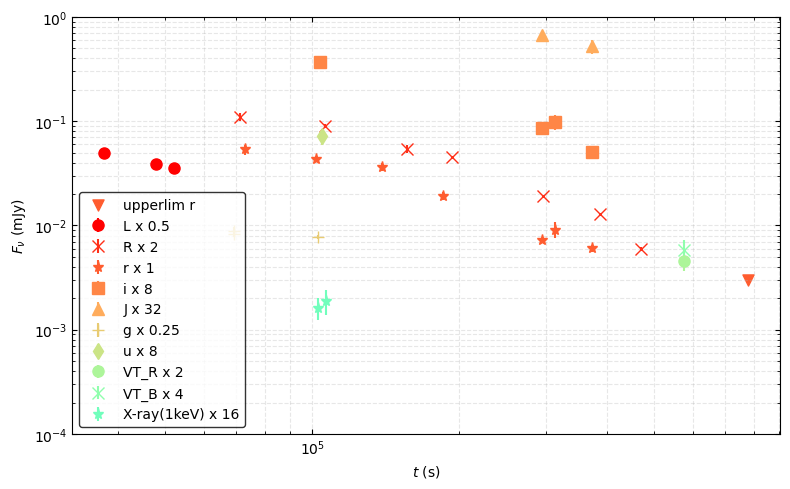

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import jetsimpy_plot as jplt
import importlib

importlib.reload(jplt)
%matplotlib inline 

def obs_plot(basedir, observed_data, upperlims_data=None, show_plot=False, save_plot=True):

    df_allobs = pd.read_csv(observed_data)
    df_upperlims = None
    if upperlims_data is not None:
        df_upperlims = pd.read_csv(upperlims_data)

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    cmap = matplotlib.colormaps.get_cmap('rainbow_r')  # or 'plasma', 'cividis', 'magma'
    colors = cmap(np.linspace(0, 1, len(jplt.filt_freqs)))
    markers = ['o','x','*','s','^','+','d']

    # plot the actual observations
    
    # Get unique filters and iterate over them
    if df_upperlims is not None:
        unique_filters = pd.unique(pd.concat(
            [df_allobs['Filt'], df_upperlims['Filt']], ignore_index=True
        ).dropna())
    else:
        unique_filters = df_allobs['Filt'].dropna().unique()
    
    for i, band in enumerate(unique_filters):
        if band in jplt.multipliers: 
            multiplier = jplt.multipliers[band]
        else: 
            raise ValueError(f'Unknown band {band}')

        # Get data for this specific filter
        Fnu_allobs = df_allobs[df_allobs['Filt']==band][['Times','Fluxes', 'FluxErrs']].sort_values(by='Times').to_numpy()

        ax.errorbar(
                Fnu_allobs[:,0], Fnu_allobs[:,1]*multiplier,
                yerr=Fnu_allobs[:,2]*multiplier,
                fmt=markers[i%len(markers)],
                markersize=8, alpha=1,
                color=colors[i],
                label=f'{band} x {multiplier:g}'
        )

        if df_upperlims is not None:
            upperlims = df_upperlims[df_upperlims['Filt']==band][['Times','Fluxes', 'FluxErrs']].sort_values(by='Times').to_numpy()
            if len(upperlims) > 0:
                ax.scatter(
                    upperlims[:,0], upperlims[:,1]*multiplier,
                    marker='v',
                    s=64, alpha=1,
                    color=colors[i], 
                    label=f'upperlim {band}'
                )

    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-4)
    ax.set_xlabel(r'$t$ (s)')
    ax.set_ylabel(r'$F_\nu$ (mJy)')
    ax.grid(True, which='both', linestyle='--', alpha=0.3)

    ax.legend(edgecolor='k', loc="lower left", ncol=1)
    fig.tight_layout()

    if save_plot:
        logging.info(f"Saving lightcurve fit plot to: {basedir}/obs.png")
        fig.savefig(f"{basedir}/obs.png", format='png', bbox_inches='tight')
    if show_plot:
        print('displaying plot')
        plt.show()
    plt.close(fig)

obs_plot('output', 'data/GRB250916A_cons_trunc.csv', 'data/GRB250916A_ul.csv', show_plot=True, save_plot=False)

# Convert AB Mag to Flux in mJy

In [6]:
import astropy
import astropy.units as u
abmag=22.7
f0 = 3631 * u.Jy
    
# Convert AB magnitude to flux density in Jy
flux_jy = f0 * 10**(-0.4 * abmag)
    
# Convert to mJy
flux_mjy = flux_jy.to(u.mJy)

print(f'abmag={abmag} => flux in mJy={flux_mjy}')

abmag=22.7 => flux in mJy=0.003020134252873798 mJy
